# Neural Network - Exercise 01

	python -m venv NN-venv
	NN-venv\Scripts\activate
	python -m pip install --upgrade pip
	pip install matplotlib numpy ipykernel jupyter
	ipython kernel install --name "NN-venv" --user
	https://queirozf.com/entries/jupyter-kernels-how-to-add-change-remove

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import jupyprint.jupyprint as jp
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import sys
sys.path.insert(1, '../')
import shrimps_class
# from graphviz import Digraph 

## Sigmoid Function

$\text{Sigmoid}(x)=\dfrac{1}{1+e^{-x}}$

$\dfrac{\partial}{\partial x}\left[\text{Sigmoid}(x)\right]=\dfrac{e^{-x}}{(1+e^{-x})^2}=\dfrac{1}{1+e^{-x}}\cdot\left(1-\dfrac{1}{1+e^{-x}}\right)$

## Stochastic Gradient Descent
$w'_i=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial w_i}=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial P}\cdot\frac{\partial P}{\partial t}\cdot\frac{\partial t}{\partial w_i}$ 

Con:
- $w_i$: Peso della i-esima feature
- $\text{LR}$: Learning Rate
- $f_{cost}$: Funzione di costo
- $t$: Combinazione lineare delle feature pesate 
- $P$: Combinazione lineare normalizzata con la sigmoid

## Training

Initial weights: [-0.11209349 -0.87099771 -0.13312881]
Final weights: [ 7.89462632 -0.21791552 -3.73174859]


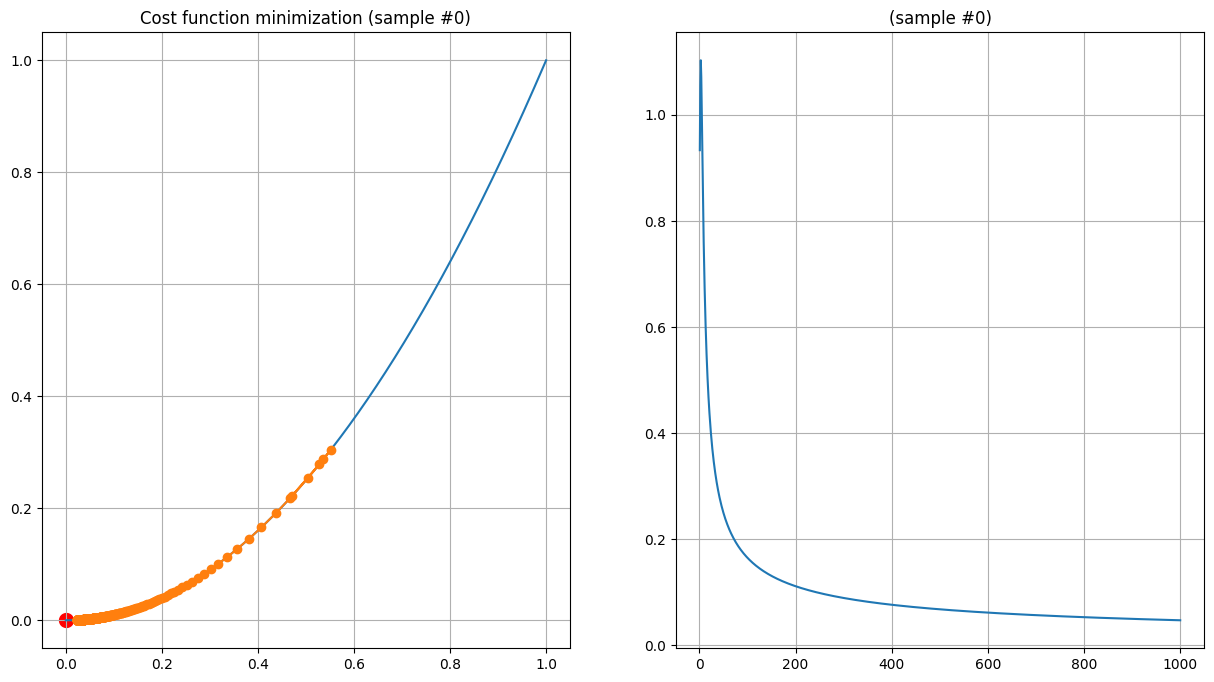

In [22]:
flag_load_mat 	= False
flag_save		= False

# initial parameters

if flag_load_mat:
	file_name 		= 'Trained_Network.mat'
	# file_name = 'Trained_Network-(2024-05-01_19-31-24).mat'
	mat_data 		= loadmat(file_name)

	weights        	= mat_data['Weight'][0]
	correct_outputs = mat_data['correct_Output'].T[0]
	epochs          = mat_data['epoch'][0][0]
	inputs       	= mat_data['input']

else:
	weights         = 2 * np.random.rand(3) - 1                # crea una matrice 1x3 con numeri casuali tra -1 e 1
	correct_outputs = np.array([0, 0, 1, 1])               
	epochs          = 1000
	inputs          = np.array([[0, 0, 1],
								[0, 1, 1],
								[1, 0, 1],
								[1, 1, 1]])


# Allena il modello in base all'epoca scelta 
NN = shrimps_class.NN_Class()

results = NN.training(
				weights         = weights, 
				inputs          = inputs, 
				correct_outputs = correct_outputs, 
				epochs          = epochs,
				LR              = 0.9
				)

print('Initial weights:', results['container_weights'][0])
print('Final weights:', results['container_weights'][-1])

if flag_save:
	date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
	file_name = f'Trained_Network-[{date}].mat'
	savemat(file_name, results)

NN.plt_epochs(results = results, idx_sample = 0)

## Testing

In [4]:
file_name = None

if file_name:
	mat_data = loadmat(file_name)
	correct_outputs = mat_data['correct_outputs']
	inputs          = mat_data['inputs']
	
print('Expected outputs:', correct_outputs)
print('Predicted outputs:', NN.testing(inputs))

Expected outputs: [0 0 1 1]
Predicted outputs: [0.02341252 0.01890132 0.98467465 0.9810004 ]
